In [1]:
#input necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#load the dataset
#pd.read_csv('BUST08039_25_S2.git/hotel_bookings.csv') 
pd.read_csv('hotel_bookings.csv') 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015.0,July,27.0,1.0,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
1,Resort Hotel,0.0,737.0,2015.0,July,27.0,1.0,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
2,Resort Hotel,0.0,7.0,2015.0,July,27.0,1.0,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
3,Resort Hotel,0.0,13.0,2015.0,July,27.0,1.0,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119389,City Hotel,0.0,23.0,2017.0,August,35.0,30.0,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06/09/2017
119390,City Hotel,0.0,102.0,2017.0,August,35.0,31.0,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07/09/2017
119391,City Hotel,0.0,34.0,2017.0,August,35.0,31.0,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07/09/2017
119392,City Hotel,0.0,109.0,2017.0,August,35.0,31.0,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07/09/2017


In [3]:
#df = pd.read_csv('BUST08039_25_S2.git/hotel_bookings.csv')
df = pd.read_csv('hotel_bookings.csv') 

In [4]:
#data cleaning
df = df.dropna(subset=['is_canceled']) 

In [5]:
# Fix inconsistent naming in market_segment
df['market_segment'] = df['market_segment'].replace({
    'Online Travel Agent': 'Online TA',
    'Online travel agent': 'Online TA'
})

In [6]:
# Calculate cancellation rates by the selected features and take mean as the reference object.
cancelled_by_lead_time = df.groupby('lead_time')['is_canceled'].mean()
cancelled_by_market_segment = df.groupby('market_segment')['is_canceled'].mean()
cancelled_by_deposit_type = df.groupby('deposit_type')['is_canceled'].mean()

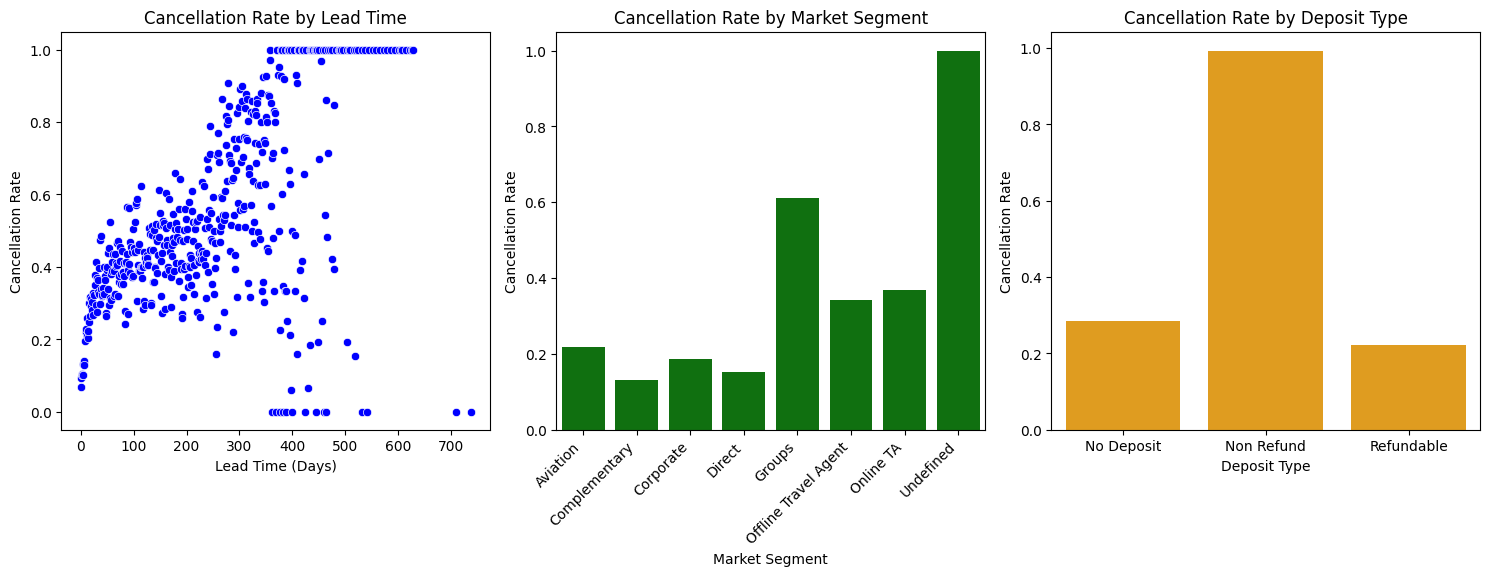

In [7]:
plt.figure(figsize=(15, 10)) 
#Use scatter plot to test the correlation between lead time and cancellation rate
plt.subplot(2, 3, 1)
sns.scatterplot(x=cancelled_by_lead_time.index, y=cancelled_by_lead_time.values, color='blue')
plt.title('Cancellation Rate by Lead Time')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Cancellation Rate')
#Bar chat reflect which path of hotel reservation has the highest cancellation rate
plt.subplot(2, 3, 2)
sns.barplot(x=cancelled_by_market_segment.index, y=cancelled_by_market_segment.values, color='green')
plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45, ha='right')
#Bar chart for deposite type
plt.subplot(2, 3, 3)
sns.barplot(x=cancelled_by_deposit_type.index, y=cancelled_by_deposit_type.values, color='orange')
plt.title('Cancellation Rate by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Cancellation Rate')
plt.tight_layout()
plt.show()

Business Question:
What factors most significantly contribute to hotel booking cancellations, and how can these insights help reduce cancellation rates?

Relevance:
High cancellation rates disrupt hotel revenue forecasting and resource allocation. Understanding key drivers helps hotels adjust policies and improve booking quality.

Data Justification:
The project analyzed lead time, market segment, and deposit type — all directly linked to customer behavior and booking intentions, making them strong predictors of cancellations.

Findings and Insights:
The scatter plot shows that longer lead times are associated with higher cancellation rates, indicating that early bookings are more likely to be canceled. Excluding 'undifined' and 'Groups' parts, the market segment bar chart reveals that bookings from 'Online Travel Agent'segments have the highest cancellation rates. The deposit type chart highlights that 'Non Refund' bookings have nearly zero cancellations, while 'No Deposit' and 'Refundable' types are more frequently canceled.

Conclusion:
For long lead times, Hotel can adjust the maximum date that the room can be reserved so that it can avoid the cancellation due to the long lead time.

For Online TA bookings, implement differentiated pricing, offering lower rates for direct bookings and loyalty programs to shift customers toward more reliable channels.

Reconsider Non-Refund policies, replacing them with partially refundable or credit-based solutions to discourage impulsive, high-risk bookings while still protecting hotel revenue.

Overall mark: 68

#### Business Question:
The business question is clearly identified and is well-connected to the given dataset. The significance of answering the question is also explained. Comprehensive and solid evidences are present to derive findings and implications. Actionable advices are also presented for the hotel industry, which is data-supported.

<u>Excellent</u>

#### Data:
Three key variables, lead time, market segment and deposite type, are effectively employed to answer the proposed question. The rationale of choosing these variables are addressed clearly. However, it would be better to provde the detailed rationale for each variable. Appropriate data filtering and data grouping are used, which shows good skill of data manipulation. Improvements could include applying some variable transformations to extract useful features.

<u>Very Good</u>

#### Visualization:
Multiple meaningful plots are presented for the visualization purpose, which includes a scatter plot and two bar charts. All plots come with essential elements of titles, axis labels and ticks, and are informative. Improvements could include explaining the flat dots at the top and the bottom in the scatter plot. Additionally, the undefined group for the cancellation rate by market segment requires further clarification.

<u>Very Good</u>

#### Code:
The code structure is clean and easy to follow. There are no obvious errors, except a minor issue in data importing (you should use 'hotel_bookings.csv' as provided, instead the file name that only exists on your machine). Necessary comments are available, yet the coding technique is at a basic level.

<u>Good</u>

In [8]:
(70+70+70+60) / 4

67.5